In [ ]:
from google.colab import drive    
drive.mount('/content/drive')     

Mounted at /content/drive


In [ ]:
pip install tweet-preprocessor

In [ ]:
import pickle
import pandas as pd
import nltk
import re
from nltk.tokenize import TweetTokenizer
from torchvision import transforms,models
from PIL import Image
from torchtext import vocab as torchtext_vocab
import torch
import torch.nn as nn
import random as rn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler , Dataset
import torch.optim as optim
from tqdm import tqdm
from torch.nn.utils import clip_grad_norm_
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence
import glob
import sys
import torch.nn.functional as F
from sklearn.metrics import f1_score

import spacy
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
stop_words = stopwords.words("english")
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))
import pandas as pd
import preprocessor as tweet_cleaner_lib
import re


tokenizer = TweetTokenizer()

stopwords = set(stop_words).union(STOP_WORDS)
stopwords = set(stop_words)
exceptionStopwords = {
    'again',
    'against',
    'ain',
    'almost',
    'anyhow',
    'anyway',
    'aren',
    "aren't",
    'below',
    'bottom',
    'but',
    'cannot',
    "couldn't",
    "didn",
    "didn't",
    'done',
    'down',
    'doesn',
    "doesn't",
    'don',
    "don't",
    'except',
    'few',
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'however',
    'isn',
    "isn't",
    'least',
    'mightn',
    "mightn't",
    'must',
    'mustn',
    "mustn't",
    'needn',
    "needn't",
    "neither",
    'never',
    'nevertheless',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'not',
    'nothing',
    'should',
    "should've",
    'shouldn',
    "shouldn't",
    'too',
    'top',
    'up',
    'wasn',
    "wasn't",
    'well',
    "weren't",
    'weren',
    'won',
    "won't",
    'wouldn',
    "wouldn't"
    
}
finalstop = stopwords - exceptionStopwords

contractions = {"'cause": 'because',
                ',cause': 'because',
                ';cause': 'because',
                "ain't": 'am not',
                'ain,t': 'am not',
                'ain;t': 'am not',
                'ain´t': 'am not',
                'ain’t': 'am not',
                "aren't": 'are not',
                'aren,t': 'are not',
                'aren;t': 'are not',
                'aren´t': 'are not',
                'aren’t': 'are not',
                "can't": 'cannot',
                "can't've": 'cannot have',
                'can,t': 'cannot',
                'can,t,ve': 'cannot have',
                'can;t': 'cannot',
                'can;t;ve': 'cannot have',
                'can´t': 'cannot',
                'can´t´ve': 'cannot have',
                'can’t': 'cannot',
                'can’t’ve': 'cannot have',
                "could've": 'could have',
                'could,ve': 'could have',
                'could;ve': 'could have',
                "couldn't": 'could not',
                "couldn't've": 'could not have',
                'couldn,t': 'could not',
                'couldn,t,ve': 'could not have',
                'couldn;t': 'could not',
                'couldn;t;ve': 'could not have',
                'couldn´t': 'could not',
                'couldn´t´ve': 'could not have',
                'couldn’t': 'could not',
                'couldn’t’ve': 'could not have',
                'could´ve': 'could have',
                'could’ve': 'could have',
                "didn't": 'did not',
                'didn,t': 'did not',
                'didn;t': 'did not',
                'didn´t': 'did not',
                'didn’t': 'did not',
                "doesn't": 'does not',
                'doesn,t': 'does not',
                'doesn;t': 'does not',
                'doesn´t': 'does not',
                'doesn’t': 'does not',
                "don't": 'do not',
                'don,t': 'do not',
                'don;t': 'do not',
                'don´t': 'do not',
                'don’t': 'do not',
                "hadn't": 'had not',
                "hadn't've": 'had not have',
                'hadn,t': 'had not',
                'hadn,t,ve': 'had not have',
                'hadn;t': 'had not',
                'hadn;t;ve': 'had not have',
                'hadn´t': 'had not',
                'hadn´t´ve': 'had not have',
                'hadn’t': 'had not',
                'hadn’t’ve': 'had not have',
                "hasn't": 'has not',
                'hasn,t': 'has not',
                'hasn;t': 'has not',
                'hasn´t': 'has not',
                'hasn’t': 'has not',
                "haven't": 'have not',
                'haven,t': 'have not',
                'haven;t': 'have not',
                'haven´t': 'have not',
                'haven’t': 'have not',
                "he'd": 'he would',
                "he'd've": 'he would have',
                "he'll": 'he will',
                "he's": 'he is',
                'he,d': 'he would',
                'he,d,ve': 'he would have',
                'he,ll': 'he will',
                'he,s': 'he is',
                'he;d': 'he would',
                'he;d;ve': 'he would have',
                'he;ll': 'he will',
                'he;s': 'he is',
                'he´d': 'he would',
                'he´d´ve': 'he would have',
                'he´ll': 'he will',
                'he´s': 'he is',
                'he’d': 'he would',
                'he’d’ve': 'he would have',
                'he’ll': 'he will',
                'he’s': 'he is',
                "how'd": 'how did',
                "how'll": 'how will',
                "how's": 'how is',
                'how,d': 'how did',
                'how,ll': 'how will',
                'how,s': 'how is',
                'how;d': 'how did',
                'how;ll': 'how will',
                'how;s': 'how is',
                'how´d': 'how did',
                'how´ll': 'how will',
                'how´s': 'how is',
                'how’d': 'how did',
                'how’ll': 'how will',
                'how’s': 'how is',
                "i'd": 'i would',
                "i'll": 'i will',
                "i'm": 'i am',
                "i've": 'i have',
                'i,d': 'i would',
                'i,ll': 'i will',
                'i,m': 'i am',
                'i,ve': 'i have',
                'i;d': 'i would',
                'i;ll': 'i will',
                'i;m': 'i am',
                'i;ve': 'i have',
                "isn't": 'is not',
                'isn,t': 'is not',
                'isn;t': 'is not',
                'isn´t': 'is not',
                'isn’t': 'is not',
                "it'd": 'it would',
                "it'll": 'it will',
                "it's": 'it is',
                'it,d': 'it would',
                'it,ll': 'it will',
                'it,s': 'it is',
                'it;d': 'it would',
                'it;ll': 'it will',
                'it;s': 'it is',
                'it´d': 'it would',
                'it´ll': 'it will',
                'it´s': 'it is',
                'it’d': 'it would',
                'it’ll': 'it will',
                'it’s': 'it is',
                'i´d': 'i would',
                'i´ll': 'i will',
                'i´m': 'i am',
                'i´ve': 'i have',
                'i’d': 'i would',
                'i’ll': 'i will',
                'i’m': 'i am',
                'i’ve': 'i have',
                "let's": 'let us',
                'let,s': 'let us',
                'let;s': 'let us',
                'let´s': 'let us',
                'let’s': 'let us',
                "ma'am": 'madam',
                'ma,am': 'madam',
                'ma;am': 'madam',
                "mayn't": 'may not',
                'mayn,t': 'may not',
                'mayn;t': 'may not',
                'mayn´t': 'may not',
                'mayn’t': 'may not',
                'ma´am': 'madam',
                'ma’am': 'madam',
                "might've": 'might have',
                'might,ve': 'might have',
                'might;ve': 'might have',
                "mightn't": 'might not',
                'mightn,t': 'might not',
                'mightn;t': 'might not',
                'mightn´t': 'might not',
                'mightn’t': 'might not',
                'might´ve': 'might have',
                'might’ve': 'might have',
                "must've": 'must have',
                'must,ve': 'must have',
                'must;ve': 'must have',
                "mustn't": 'must not',
                'mustn,t': 'must not',
                'mustn;t': 'must not',
                'mustn´t': 'must not',
                'mustn’t': 'must not',
                'must´ve': 'must have',
                'must’ve': 'must have',
                "needn't": 'need not',
                'needn,t': 'need not',
                'needn;t': 'need not',
                'needn´t': 'need not',
                'needn’t': 'need not',
                "oughtn't": 'ought not',
                'oughtn,t': 'ought not',
                'oughtn;t': 'ought not',
                'oughtn´t': 'ought not',
                'oughtn’t': 'ought not',
                "sha'n't": 'shall not',
                'sha,n,t': 'shall not',
                'sha;n;t': 'shall not',
                "shan't": 'shall not',
                'shan,t': 'shall not',
                'shan;t': 'shall not',
                'shan´t': 'shall not',
                'shan’t': 'shall not',
                'sha´n´t': 'shall not',
                'sha’n’t': 'shall not',
                "she'd": 'she would',
                "she'll": 'she will',
                "she's": 'she is',
                'she,d': 'she would',
                'she,ll': 'she will',
                'she,s': 'she is',
                'she;d': 'she would',
                'she;ll': 'she will',
                'she;s': 'she is',
                'she´d': 'she would',
                'she´ll': 'she will',
                'she´s': 'she is',
                'she’d': 'she would',
                'she’ll': 'she will',
                'she’s': 'she is',
                "should've": 'should have',
                'should,ve': 'should have',
                'should;ve': 'should have',
                "shouldn't": 'should not',
                'shouldn,t': 'should not',
                'shouldn;t': 'should not',
                'shouldn´t': 'should not',
                'shouldn’t': 'should not',
                'should´ve': 'should have',
                'should’ve': 'should have',
                "that'd": 'that would',
                "that's": 'that is',
                'that,d': 'that would',
                'that,s': 'that is',
                'that;d': 'that would',
                'that;s': 'that is',
                'that´d': 'that would',
                'that´s': 'that is',
                'that’d': 'that would',
                'that’s': 'that is',
                "there'd": 'there had',
                "there's": 'there is',
                'there,d': 'there had',
                'there,s': 'there is',
                'there;d': 'there had',
                'there;s': 'there is',
                'there´d': 'there had',
                'there´s': 'there is',
                'there’d': 'there had',
                'there’s': 'there is',
                "they'd": 'they would',
                "they'll": 'they will',
                "they're": 'they are',
                "they've": 'they have',
                'they,d': 'they would',
                'they,ll': 'they will',
                'they,re': 'they are',
                'they,ve': 'they have',
                'they;d': 'they would',
                'they;ll': 'they will',
                'they;re': 'they are',
                'they;ve': 'they have',
                'they´d': 'they would',
                'they´ll': 'they will',
                'they´re': 'they are',
                'they´ve': 'they have',
                'they’d': 'they would',
                'they’ll': 'they will',
                'they’re': 'they are',
                'they’ve': 'they have',
                "wasn't": 'was not',
                'wasn,t': 'was not',
                'wasn;t': 'was not',
                'wasn´t': 'was not',
                'wasn’t': 'was not',
                "we'd": 'we would',
                "we'll": 'we will',
                "we're": 'we are',
                "we've": 'we have',
                'we,d': 'we would',
                'we,ll': 'we will',
                'we,re': 'we are',
                'we,ve': 'we have',
                'we;d': 'we would',
                'we;ll': 'we will',
                'we;re': 'we are',
                'we;ve': 'we have',
                "weren't": 'were not',
                'weren,t': 'were not',
                'weren;t': 'were not',
                'weren´t': 'were not',
                'weren’t': 'were not',
                'we´d': 'we would',
                'we´ll': 'we will',
                'we´re': 'we are',
                'we´ve': 'we have',
                'we’d': 'we would',
                'we’ll': 'we will',
                'we’re': 'we are',
                'we’ve': 'we have',
                "what'll": 'what will',
                "what're": 'what are',
                "what's": 'what is',
                "what've": 'what have',
                'what,ll': 'what will',
                'what,re': 'what are',
                'what,s': 'what is',
                'what,ve': 'what have',
                'what;ll': 'what will',
                'what;re': 'what are',
                'what;s': 'what is',
                'what;ve': 'what have',
                'what´ll': 'what will',
                'what´re': 'what are',
                'what´s': 'what is',
                'what´ve': 'what have',
                'what’ll': 'what will',
                'what’re': 'what are',
                'what’s': 'what is',
                'what’ve': 'what have',
                "where'd": 'where did',
                "where's": 'where is',
                'where,d': 'where did',
                'where,s': 'where is',
                'where;d': 'where did',
                'where;s': 'where is',
                'where´d': 'where did',
                'where´s': 'where is',
                'where’d': 'where did',
                'where’s': 'where is',
                "who'll": 'who will',
                "who's": 'who is',
                'who,ll': 'who will',
                'who,s': 'who is',
                'who;ll': 'who will',
                'who;s': 'who is',
                'who´ll': 'who will',
                'who´s': 'who is',
                'who’ll': 'who will',
                'who’s': 'who is',
                "won't": 'will not',
                'won,t': 'will not',
                'won;t': 'will not',
                'won´t': 'will not',
                'won’t': 'will not',
                "wouldn't": 'would not',
                'wouldn,t': 'would not',
                'wouldn;t': 'would not',
                'wouldn´t': 'would not',
                'wouldn’t': 'would not',
                "you'd": 'you would',
                "you'll": 'you will',
                "you're": 'you are',
                'you,d': 'you would',
                'you,ll': 'you will',
                'you,re': 'you are',
                'you;d': 'you would',
                'you;ll': 'you will',
                'you;re': 'you are',
                'you´d': 'you would',
                'you´ll': 'you will',
                'you´re': 'you are',
                'you’d': 'you would',
                'you’ll': 'you will',
                'you’re': 'you are',
                '´cause': 'because',
                '’cause': 'because',
                "you've": "you have",
                "could'nt": 'could not',
                "havn't": 'have not',
                "here’s": "here is",
                'i""m': 'i am',
                "i'am": 'i am',
                "i'l": "i will",
                "i'v": 'i have',
                "wan't": 'want',
                "was'nt": "was not",
                "who'd": "who would",
                "who're": "who are",
                "who've": "who have",
                "why'd": "why would",
                "would've": "would have",
                "y'all": "you all",
                "y'know": "you know",
                "you.i": "you i",
                "your'e": "you are",
                "arn't": "are not",
                "agains't": "against",
                "c'mon": "common",
                "doens't": "does not",
                'don""t': "do not",
                "dosen't": "does not",
                "dosn't": "does not",
                "shoudn't": "should not",
                "that'll": "that will",
                "there'll": "there will",
                "there're": "there are",
                "this'll": "this all",
                "u're": "you are",
                "ya'll": "you all",
                "you'r": "you are",
                "you’ve": "you have",
                "d'int": "did not",
                "did'nt": "did not",
                "din't": "did not",
                "dont't": "do not",
                "gov't": "government",
                "i'ma": "i am",
                "is'nt": "is not",

                }


def Replace_contractions(text):
    text = text.split()
    new_text = []
    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
            continue
        if word.lower() in contractions:
            new_text.append(contractions[word.lower()])
            continue
        else:
            new_text.append(word)
    text = " ".join(new_text)

    return text

def Remove_stopwords(x):
    return [token for token in x if token not in finalstop]

def text_cleaner(text,replace_contradictions,remove_stopwords):
    text = re.sub(r"\d+th\s"," ",text)
    text = re.sub(r"1st\s" ," first ",text)
    text = re.sub(r"2nd\s"," second ",text)
    text = re.sub(r"3rd\s"," third ",text)
    text = tweet_cleaner_lib.clean(text)
    if(replace_contradictions):
        text = Replace_contractions(text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = tokenizer.tokenize(text)
    if(remove_stopwords):
        text = Remove_stopwords(text)
    text = (" ".join(text)).strip()
    if(text == ''):
        text = '<NULL>'
    return text


def Read_Data(fname):
  df = pd.read_csv(fname,encoding='utf-8')
  #print(df['tweet'].tolist())
  print('The query tweets are: ')
  print(df['tweet'].tolist())
  data = list(map(lambda x:text_cleaner(x,replace_contradictions=True,remove_stopwords=True),df['tweet'].tolist()))
  words_to_ids = pickle.load( open( '/content/drive/My Drive/DEMO/W2I.pickle', "rb" ) )
  return words_to_ids, data, df

def sentence2ids(text, word2ids):
    text_ids = []
    for word in text:
        try:
            text_ids.append(word2ids[word])
        except:
            text_ids.append(0)
    return torch.tensor(text_ids)

def load_em():
  matrix = pickle.load( open('/content/drive/My Drive/DEMO/embedding_matrix.pickle', "rb" ) )
  return matrix


class Dataloader_generator(nn.Module):  
    def __init__(self,BATCH_SIZE,W2I,S2I,tokenizer):
        super().__init__()
        self.batchsize = BATCH_SIZE
        self.W2I = W2I
        self.S2I = S2I
        self.tokenizer = tokenizer


    def collater(self,batch): 
        t1 = [item['t1'] for item in batch]
        t2 = [item['t2'] for item in batch]
        t3 = [item['t3'] for item in batch]
        t4 = [item['t4'] for item in batch]
        t5 = [item['t5'] for item in batch]
        t6 = [item['t6'] for item in batch]
        t7 = [item['t7'] for item in batch]
        t8 = [item['t8'] for item in batch]
        t9 = [item['t9'] for item in batch]
        t10 = [item['t10'] for item in batch]
        t11 = [item['t11'] for item in batch]
        t12 = [item['t12'] for item in batch]
        t13 = [item['t13'] for item in batch]
        t14 = [item['t14'] for item in batch]
        t15 = [item['t15'] for item in batch]
        t16 = [item['t16'] for item in batch]
        t17 = [item['t17'] for item in batch]
        t18 = [item['t18'] for item in batch]
        t19 = [item['t19'] for item in batch]
        t20 = [item['t20'] for item in batch]
        t21 = [item['t21'] for item in batch]
        t22 = [item['t22'] for item in batch]
        t23 = [item['t23'] for item in batch]
        t24 = [item['t24'] for item in batch]
        t25 = [item['t25'] for item in batch]
        t26 = [item['t26'] for item in batch]
        t27 = [item['t27'] for item in batch]
        t28 = [item['t28'] for item in batch]
        t29 = [item['t29'] for item in batch]
        t30 = [item['t30'] for item in batch]
        t31 = [item['t31'] for item in batch]
        t32 = [item['t32'] for item in batch]
        t33 = [item['t33'] for item in batch]
        t34 = [item['t34'] for item in batch]
        t35 = [item['t35'] for item in batch]
        t36 = [item['t36'] for item in batch]
        t37 = [item['t37'] for item in batch]
        t38 = [item['t38'] for item in batch]
        t39 = [item['t39'] for item in batch]
        t40 = [item['t40'] for item in batch]
        t41 = [item['t41'] for item in batch]
        t42 = [item['t42'] for item in batch]
        t43 = [item['t43'] for item in batch]
        t44 = [item['t44'] for item in batch]
        t45 = [item['t45'] for item in batch]
        t46 = [item['t46'] for item in batch]
        t47 = [item['t47'] for item in batch]
        t48 = [item['t48'] for item in batch]
        t49 = [item['t49'] for item in batch]
        t50 = [item['t50'] for item in batch]
        t51 = [item['t51'] for item in batch]
        t52 = [item['t52'] for item in batch]
        t53 = [item['t53'] for item in batch]
        t54 = [item['t54'] for item in batch]
        t55 = [item['t55'] for item in batch]
        t56 = [item['t56'] for item in batch]
        t57 = [item['t57'] for item in batch]
        t58 = [item['t58'] for item in batch]
        t59 = [item['t59'] for item in batch]
        t60 = [item['t60'] for item in batch]
        t61 = [item['t61'] for item in batch]
        t62 = [item['t62'] for item in batch]
        t63 = [item['t63'] for item in batch]
        t64 = [item['t64'] for item in batch]
        t65 = [item['t65'] for item in batch]
        t66 = [item['t66'] for item in batch]
        t67 = [item['t67'] for item in batch]
        t68 = [item['t68'] for item in batch]
        t69 = [item['t69'] for item in batch]
        t70 = [item['t70'] for item in batch]
        t71 = [item['t71'] for item in batch]
        t72 = [item['t72'] for item in batch]
        t73 = [item['t73'] for item in batch]
        t74 = [item['t74'] for item in batch]
        t75 = [item['t75'] for item in batch]
        t76 = [item['t76'] for item in batch]
        t77 = [item['t77'] for item in batch]
        t78 = [item['t78'] for item in batch]
        t79 = [item['t79'] for item in batch]
        t80 = [item['t80'] for item in batch]
        t81 = [item['t81'] for item in batch]
        t82 = [item['t82'] for item in batch]
        t83 = [item['t83'] for item in batch]
        t84 = [item['t84'] for item in batch]
        t85 = [item['t85'] for item in batch]
        t86 = [item['t86'] for item in batch]
        t87 = [item['t87'] for item in batch]
        t88 = [item['t88'] for item in batch]
        t89 = [item['t89'] for item in batch]
        t90 = [item['t90'] for item in batch]
        t91 = [item['t91'] for item in batch]
        t92 = [item['t92'] for item in batch]
        t93 = [item['t93'] for item in batch]
        t94 = [item['t94'] for item in batch]
        t95 = [item['t95'] for item in batch]
        t96 = [item['t96'] for item in batch]
        t97 = [item['t97'] for item in batch]
        t98 = [item['t98'] for item in batch]
        t99 = [item['t99'] for item in batch]
        t100 = [item['t100'] for item in batch]

        t1 = pad_sequence(t1,batch_first= True ,padding_value= 0).long()
        t2 = pad_sequence(t2,batch_first= True ,padding_value= 0).long()
        t3 = pad_sequence(t3,batch_first= True ,padding_value= 0).long()
        t4 = pad_sequence(t4,batch_first= True ,padding_value= 0).long()
        t5 = pad_sequence(t5,batch_first= True ,padding_value= 0).long()
        t6 = pad_sequence(t6,batch_first= True ,padding_value= 0).long()
        t7 = pad_sequence(t7,batch_first= True ,padding_value= 0).long()
        t8 = pad_sequence(t8,batch_first= True ,padding_value= 0).long()
        t9 = pad_sequence(t9,batch_first= True ,padding_value= 0).long()
        t10 = pad_sequence(t10,batch_first= True ,padding_value= 0).long()
        t11 = pad_sequence(t11,batch_first= True ,padding_value= 0).long()
        t12 = pad_sequence(t12,batch_first= True ,padding_value= 0).long()
        t13 = pad_sequence(t13,batch_first= True ,padding_value= 0).long()
        t14 = pad_sequence(t14,batch_first= True ,padding_value= 0).long()
        t15 = pad_sequence(t15,batch_first= True ,padding_value= 0).long()
        t16 = pad_sequence(t16,batch_first= True ,padding_value= 0).long()
        t17 = pad_sequence(t17,batch_first= True ,padding_value= 0).long()
        t18 = pad_sequence(t18,batch_first= True ,padding_value= 0).long()
        t19 = pad_sequence(t19,batch_first= True ,padding_value= 0).long()
        t20 = pad_sequence(t20,batch_first= True ,padding_value= 0).long()
        t21 = pad_sequence(t21,batch_first= True ,padding_value= 0).long()
        t22 = pad_sequence(t22,batch_first= True ,padding_value= 0).long()
        t23 = pad_sequence(t23,batch_first= True ,padding_value= 0).long()
        t24 = pad_sequence(t24,batch_first= True ,padding_value= 0).long()
        t25 = pad_sequence(t25,batch_first= True ,padding_value= 0).long()
        t26 = pad_sequence(t26,batch_first= True ,padding_value= 0).long()
        t27 = pad_sequence(t27,batch_first= True ,padding_value= 0).long()
        t28 = pad_sequence(t28,batch_first= True ,padding_value= 0).long()
        t29 = pad_sequence(t29,batch_first= True ,padding_value= 0).long()
        t30 = pad_sequence(t30,batch_first= True ,padding_value= 0).long()
        t31 = pad_sequence(t31,batch_first= True ,padding_value= 0).long()
        t32 = pad_sequence(t32,batch_first= True ,padding_value= 0).long()
        t33 = pad_sequence(t33,batch_first= True ,padding_value= 0).long()
        t34 = pad_sequence(t34,batch_first= True ,padding_value= 0).long()
        t35 = pad_sequence(t35,batch_first= True ,padding_value= 0).long()
        t36 = pad_sequence(t36,batch_first= True ,padding_value= 0).long()
        t37 = pad_sequence(t37,batch_first= True ,padding_value= 0).long()
        t38 = pad_sequence(t38,batch_first= True ,padding_value= 0).long()
        t39 = pad_sequence(t39,batch_first= True ,padding_value= 0).long()
        t40 = pad_sequence(t40,batch_first= True ,padding_value= 0).long()
        t41 = pad_sequence(t41,batch_first= True ,padding_value= 0).long()
        t42 = pad_sequence(t42,batch_first= True ,padding_value= 0).long()
        t43 = pad_sequence(t43,batch_first= True ,padding_value= 0).long()
        t44 = pad_sequence(t44,batch_first= True ,padding_value= 0).long()
        t45 = pad_sequence(t45,batch_first= True ,padding_value= 0).long()
        t46 = pad_sequence(t46,batch_first= True ,padding_value= 0).long()
        t47 = pad_sequence(t47,batch_first= True ,padding_value= 0).long()
        t48 = pad_sequence(t48,batch_first= True ,padding_value= 0).long()
        t49 = pad_sequence(t49,batch_first= True ,padding_value= 0).long()
        t50 = pad_sequence(t50,batch_first= True ,padding_value= 0).long()
        t51 = pad_sequence(t51,batch_first= True ,padding_value= 0).long()
        t52 = pad_sequence(t52,batch_first= True ,padding_value= 0).long()
        t53 = pad_sequence(t53,batch_first= True ,padding_value= 0).long()
        t54 = pad_sequence(t54,batch_first= True ,padding_value= 0).long()
        t55 = pad_sequence(t55,batch_first= True ,padding_value= 0).long()
        t56 = pad_sequence(t56,batch_first= True ,padding_value= 0).long()
        t57 = pad_sequence(t57,batch_first= True ,padding_value= 0).long()
        t58 = pad_sequence(t58,batch_first= True ,padding_value= 0).long()
        t59 = pad_sequence(t59,batch_first= True ,padding_value= 0).long()
        t60 = pad_sequence(t60,batch_first= True ,padding_value= 0).long()
        t61 = pad_sequence(t61,batch_first= True ,padding_value= 0).long()
        t62 = pad_sequence(t62,batch_first= True ,padding_value= 0).long()
        t63 = pad_sequence(t63,batch_first= True ,padding_value= 0).long()
        t64 = pad_sequence(t64,batch_first= True ,padding_value= 0).long()
        t65 = pad_sequence(t65,batch_first= True ,padding_value= 0).long()
        t66 = pad_sequence(t66,batch_first= True ,padding_value= 0).long()
        t67 = pad_sequence(t67,batch_first= True ,padding_value= 0).long()
        t68 = pad_sequence(t68,batch_first= True ,padding_value= 0).long()
        t69 = pad_sequence(t69,batch_first= True ,padding_value= 0).long()
        t70 = pad_sequence(t70,batch_first= True ,padding_value= 0).long()
        t71 = pad_sequence(t71,batch_first= True ,padding_value= 0).long()
        t72 = pad_sequence(t72,batch_first= True ,padding_value= 0).long()
        t73 = pad_sequence(t73,batch_first= True ,padding_value= 0).long()
        t74 = pad_sequence(t74,batch_first= True ,padding_value= 0).long()
        t75 = pad_sequence(t75,batch_first= True ,padding_value= 0).long()
        t76 = pad_sequence(t76,batch_first= True ,padding_value= 0).long()
        t77 = pad_sequence(t77,batch_first= True ,padding_value= 0).long()
        t78 = pad_sequence(t78,batch_first= True ,padding_value= 0).long()
        t79 = pad_sequence(t79,batch_first= True ,padding_value= 0).long()
        t80 = pad_sequence(t80,batch_first= True ,padding_value= 0).long()
        t81 = pad_sequence(t81,batch_first= True ,padding_value= 0).long()
        t82 = pad_sequence(t82,batch_first= True ,padding_value= 0).long()
        t83 = pad_sequence(t83,batch_first= True ,padding_value= 0).long()
        t84 = pad_sequence(t84,batch_first= True ,padding_value= 0).long()
        t85 = pad_sequence(t85,batch_first= True ,padding_value= 0).long()
        t86 = pad_sequence(t86,batch_first= True ,padding_value= 0).long()
        t87 = pad_sequence(t87,batch_first= True ,padding_value= 0).long()
        t88 = pad_sequence(t88,batch_first= True ,padding_value= 0).long()
        t89 = pad_sequence(t89,batch_first= True ,padding_value= 0).long()
        t90 = pad_sequence(t90,batch_first= True ,padding_value= 0).long()
        t91 = pad_sequence(t91,batch_first= True ,padding_value= 0).long()
        t92 = pad_sequence(t92,batch_first= True ,padding_value= 0).long()
        t93 = pad_sequence(t93,batch_first= True ,padding_value= 0).long()
        t94 = pad_sequence(t94,batch_first= True ,padding_value= 0).long()
        t95 = pad_sequence(t95,batch_first= True ,padding_value= 0).long()
        t96 = pad_sequence(t96,batch_first= True ,padding_value= 0).long()
        t97 = pad_sequence(t97,batch_first= True ,padding_value= 0).long()
        t98 = pad_sequence(t98,batch_first= True ,padding_value= 0).long()
        t99 = pad_sequence(t99,batch_first= True ,padding_value= 0).long()
        t100 = pad_sequence(t100,batch_first= True ,padding_value= 0).long()


        return (t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20, t21,t22,t23,t24,t25,t26,t27,t28,t29,t30, t31,t32,t33,t34,t35,t36,t37,t38,t39,t40, t41,t42,t43,t44,t45,t46,t47,t48,t49,t50, t51,t52,t53,t54,t55,t56,t57,t58,t59,t60, t61,t62,t63,t64,t65,t66,t67,t68,t69,t70, t71,t72,t73,t74,t75,t76,t77,t78,t79,t80, t81,t82,t83,t84,t85,t86,t87,t88,t89,t90, t91,t92,t93,t94,t95,t96,t97,t98,t99,t100)
        
    def forward(self,text_data):
        dataset = dataset_generator(text_data,self.W2I,self.S2I,self.tokenizer)
        dataloader = DataLoader(dataset=dataset, batch_size=self.batchsize, shuffle=True, collate_fn= self.collater)
            
        return dataloader

class dataset_generator(Dataset):
    def __init__(self,text_data,W2I , S2I,tokenizer):
        super(dataset_generator, self).__init__()
        self.W2I = W2I
        self.S2I = S2I
        self.tokenizer = tokenizer
        self.text_data = text_data
        
        t1,t2,t3,t4,t5,t6,t7,t8,t9,t10, t11,t12,t13,t14,t15,t16,t17,t18,t19,t20, t21,t22,t23,t24,t25,t26,t27,t28,t29,t30, t31,t32,t33,t34,t35,t36,t37,t38,t39,t40, t41,t42,t43,t44,t45,t46,t47,t48,t49,t50, t51,t52,t53,t54,t55,t56,t57,t58,t59,t60, t61,t62,t63,t64,t65,t66,t67,t68,t69,t70, t71,t72,t73,t74,t75,t76,t77,t78,t79,t80, t81,t82,t83,t84,t85,t86,t87,t88,t89,t90, t91,t92,t93,t94,t95,t96,t97,t98,t99,t100 = self.extract_data(text_data)
        data = []
        for i in range(len(t1)):
            data.append({"t1":t1[i],'t2':t2[i],'t3':t3[i],'t4':t4[i],'t5':t5[i],'t6':t6[i],'t7':t7[i],'t8':t8[i],'t9':t9[i],'t10':t10[i],"t11":t11[i],'t12':t12[i],'t13':t13[i],'t14':t14[i],'t15':t15[i],'t16':t16[i],'t17':t17[i],'t18':t18[i],'t19':t19[i],'t20':t20[i],"t21":t21[i],'t22':t22[i],'t23':t23[i],'t24':t24[i],'t25':t25[i],'t26':t26[i],'t27':t27[i],'t28':t28[i],'t29':t29[i],'t30':t30[i],"t31":t31[i],'t32':t32[i],'t33':t33[i],'t34':t34[i],'t35':t35[i],'t36':t36[i],'t37':t37[i],'t38':t38[i],'t39':t39[i],'t40':t40[i],"t41":t41[i],'t42':t42[i],'t43':t43[i],'t44':t44[i],'t45':t45[i],'t46':t46[i],'t47':t47[i],'t48':t48[i],'t49':t49[i],'t50':t50[i],"t51":t51[i],'t52':t52[i],'t53':t53[i],'t54':t54[i],'t55':t55[i],'t56':t56[i],'t57':t57[i],'t58':t58[i],'t59':t59[i],'t60':t60[i],"t61":t61[i],'t62':t62[i],'t63':t63[i],'t64':t64[i],'t65':t65[i],'t66':t66[i],'t67':t67[i],'t68':t68[i],'t69':t69[i],'t70':t70[i],"t71":t71[i],'t72':t72[i],'t73':t73[i],'t74':t74[i],'t75':t75[i],'t76':t76[i],'t77':t77[i],'t78':t78[i],'t79':t79[i],'t80':t80[i],"t81":t81[i],'t82':t82[i],'t83':t83[i],'t84':t84[i],'t85':t85[i],'t86':t86[i],'t87':t87[i],'t88':t88[i],'t89':t89[i],'t90':t90[i],"t91":t91[i],'t92':t92[i],'t93':t93[i],'t94':t94[i],'t95':t95[i],'t96':t96[i],'t97':t97[i],'t98':t98[i],'t99':t99[i],'t100':t100[i]})
        self.data = data

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return len(self.data)


    def remove_NULL(self,text):
        return text.replace("[NULL]","").replace("<NULL>","").replace("NULL","")
    
    def preprocess(self,text):
        x = self.remove_NULL(text)
        x = self.S2I(self.tokenizer.tokenize(x.lower()), self.W2I)
        if(len(x) == 0):
            x = torch.tensor([0])
        return x
    
    def extract_data(self,text_data):
        o1,o2,o3,o4,o5,o6,o7,o8,o9,o10 = [],[],[],[],[],[],[],[],[],[]
        o11,o12,o13,o14,o15,o16,o17,o18,o19,o20 = [],[],[],[],[],[],[],[],[],[]
        o21,o22,o23,o24,o25,o26,o27,o28,o29,o30 = [],[],[],[],[],[],[],[],[],[]
        o31,o32,o33,o34,o35,o36,o37,o38,o39,o40 = [],[],[],[],[],[],[],[],[],[]
        o41,o42,o43,o44,o45,o46,o47,o48,o49,o50 = [],[],[],[],[],[],[],[],[],[]
        o51,o52,o53,o54,o55,o56,o57,o58,o59,o60 = [],[],[],[],[],[],[],[],[],[]
        o61,o62,o63,o64,o65,o66,o67,o68,o69,o70 = [],[],[],[],[],[],[],[],[],[]
        o71,o72,o73,o74,o75,o76,o77,o78,o79,o80 = [],[],[],[],[],[],[],[],[],[]
        o81,o82,o83,o84,o85,o86,o87,o88,o89,o90 = [],[],[],[],[],[],[],[],[],[]
        o91,o92,o93,o94,o95,o96,o97,o98,o99,o100 = [],[],[],[],[],[],[],[],[],[]

        t1 = text_data
        o1.append(self.preprocess(t1[0]))
        o2.append(self.preprocess(t1[1]))
        o3.append(self.preprocess(t1[2]))
        o4.append(self.preprocess(t1[3]))
        o5.append(self.preprocess(t1[4]))
        o6.append(self.preprocess(t1[5]))
        o7.append(self.preprocess(t1[6]))
        o8.append(self.preprocess(t1[7]))
        o9.append(self.preprocess(t1[8]))
        o10.append(self.preprocess(t1[9]))
        o11.append(self.preprocess(t1[10]))
        o12.append(self.preprocess(t1[11]))
        o13.append(self.preprocess(t1[12]))
        o14.append(self.preprocess(t1[13]))
        o15.append(self.preprocess(t1[14]))
        o16.append(self.preprocess(t1[15]))
        o17.append(self.preprocess(t1[16]))
        o18.append(self.preprocess(t1[17]))
        o19.append(self.preprocess(t1[18]))
        o20.append(self.preprocess(t1[19]))
        o21.append(self.preprocess(t1[20]))
        o22.append(self.preprocess(t1[21]))
        o23.append(self.preprocess(t1[22]))
        o24.append(self.preprocess(t1[23]))
        o25.append(self.preprocess(t1[24]))
        o26.append(self.preprocess(t1[25]))
        o27.append(self.preprocess(t1[26]))
        o28.append(self.preprocess(t1[27]))
        o29.append(self.preprocess(t1[28]))
        o30.append(self.preprocess(t1[29]))
        o31.append(self.preprocess(t1[30]))
        o32.append(self.preprocess(t1[31]))
        o33.append(self.preprocess(t1[32]))
        o34.append(self.preprocess(t1[33]))
        o35.append(self.preprocess(t1[34]))
        o36.append(self.preprocess(t1[35]))
        o37.append(self.preprocess(t1[36]))
        o38.append(self.preprocess(t1[37]))
        o39.append(self.preprocess(t1[38]))
        o40.append(self.preprocess(t1[39]))
        o41.append(self.preprocess(t1[40]))
        o42.append(self.preprocess(t1[41]))
        o43.append(self.preprocess(t1[42]))
        o44.append(self.preprocess(t1[43]))
        o45.append(self.preprocess(t1[44]))
        o46.append(self.preprocess(t1[45]))
        o47.append(self.preprocess(t1[46]))
        o48.append(self.preprocess(t1[47]))
        o49.append(self.preprocess(t1[48]))
        o50.append(self.preprocess(t1[49]))
        o51.append(self.preprocess(t1[50]))
        o52.append(self.preprocess(t1[51]))
        o53.append(self.preprocess(t1[52]))
        o54.append(self.preprocess(t1[53]))
        o55.append(self.preprocess(t1[54]))
        o56.append(self.preprocess(t1[55]))
        o57.append(self.preprocess(t1[56]))
        o58.append(self.preprocess(t1[57]))
        o59.append(self.preprocess(t1[58]))
        o60.append(self.preprocess(t1[59]))
        o61.append(self.preprocess(t1[60]))
        o62.append(self.preprocess(t1[61]))
        o63.append(self.preprocess(t1[62]))
        o64.append(self.preprocess(t1[63]))
        o65.append(self.preprocess(t1[64]))
        o66.append(self.preprocess(t1[65]))
        o67.append(self.preprocess(t1[66]))
        o68.append(self.preprocess(t1[67]))
        o69.append(self.preprocess(t1[68]))
        o70.append(self.preprocess(t1[69]))
        o71.append(self.preprocess(t1[70]))
        o72.append(self.preprocess(t1[71]))
        o73.append(self.preprocess(t1[72]))
        o74.append(self.preprocess(t1[73]))
        o75.append(self.preprocess(t1[74]))
        o76.append(self.preprocess(t1[75]))
        o77.append(self.preprocess(t1[76]))
        o78.append(self.preprocess(t1[77]))
        o79.append(self.preprocess(t1[78]))
        o80.append(self.preprocess(t1[79]))
        o81.append(self.preprocess(t1[80]))
        o82.append(self.preprocess(t1[81]))
        o83.append(self.preprocess(t1[82]))
        o84.append(self.preprocess(t1[83]))
        o85.append(self.preprocess(t1[84]))
        o86.append(self.preprocess(t1[85]))
        o87.append(self.preprocess(t1[86]))
        o88.append(self.preprocess(t1[87]))
        o89.append(self.preprocess(t1[88]))
        o90.append(self.preprocess(t1[89]))
        o91.append(self.preprocess(t1[90]))
        o92.append(self.preprocess(t1[91]))
        o93.append(self.preprocess(t1[92]))
        o94.append(self.preprocess(t1[93]))
        o95.append(self.preprocess(t1[94]))
        o96.append(self.preprocess(t1[95]))
        o97.append(self.preprocess(t1[96]))
        o98.append(self.preprocess(t1[97]))
        o99.append(self.preprocess(t1[98]))
        o100.append(self.preprocess(t1[99]))

        return o1,o2,o3,o4,o5,o6,o7,o8,o9,o10,o11,o12,o13,o14,o15,o16,o17,o18,o19,o20, o21,o22,o23,o24,o25,o26,o27,o28,o29,o30,o31,o32,o33,o34,o35,o36,o37,o38,o39,o40, o41,o42,o43,o44,o45,o46,o47,o48,o49,o50 , o51,o52,o53,o54,o55,o56,o57,o58,o59,o60, o61,o62,o63,o64,o65,o66,o67,o68,o69,o70, o71,o72,o73,o74,o75,o76,o77,o78,o79,o80, o81,o82,o83,o84,o85,o86,o87,o88,o89,o90, o91,o92,o93,o94,o95,o96,o97,o98,o99,o100 





def load_data1(words_to_ids, data, BATCH_SIZE):
  dataloader = Dataloader_generator(BATCH_SIZE, words_to_ids,sentence2ids , tokenizer)
  input_dataloader = dataloader(data)
  return input_dataloader



class NET(nn.Module):
    def __init__(self,embedding_weights,drop_out = 0.5):
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(embedding_weights)        
        self.dropout = nn.Dropout(drop_out)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU() 
        self.dense = nn.Linear(100,1)
        self.rnn = nn.GRU(200,50,num_layers = 2,bidirectional = True , batch_first = True,dropout = drop_out)
        self.fc = nn.Linear(100,100)   


    

    def forward(self,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20, t21,t22,t23,t24,t25,t26,t27,t28,t29,t30, t31,t32,t33,t34,t35,t36,t37,t38,t39,t40, t41,t42,t43,t44,t45,t46,t47,t48,t49,t50, t51,t52,t53,t54,t55,t56,t57,t58,t59,t60, t61,t62,t63,t64,t65,t66,t67,t68,t69,t70, t71,t72,t73,t74,t75,t76,t77,t78,t79,t80, t81,t82,t83,t84,t85,t86,t87,t88,t89,t90, t91,t92,t93,t94,t95,t96,t97,t98,t99,t100):
        t1 = self.embedding(t1)
        t2 = self.embedding(t2)
        t3 = self.embedding(t3)
        t4 = self.embedding(t4)
        t5 = self.embedding(t5)
        t6 = self.embedding(t6)
        t7 = self.embedding(t7)
        t8 = self.embedding(t8)
        t9 = self.embedding(t9)
        t10 = self.embedding(t10)
        t11 = self.embedding(t11)
        t12 = self.embedding(t12)
        t13 = self.embedding(t13)
        t14 = self.embedding(t14)
        t15 = self.embedding(t15)
        t16 = self.embedding(t16)
        t17 = self.embedding(t17)
        t18 = self.embedding(t18)
        t19 = self.embedding(t19)
        t20 = self.embedding(t20)
        t21 = self.embedding(t21)
        t22 = self.embedding(t22)
        t23 = self.embedding(t23)
        t24 = self.embedding(t24)
        t25 = self.embedding(t25)
        t26 = self.embedding(t26)
        t27 = self.embedding(t27)
        t28 = self.embedding(t28)
        t29 = self.embedding(t29)
        t30 = self.embedding(t30)
        t31 = self.embedding(t31)
        t32 = self.embedding(t32)
        t33 = self.embedding(t33)
        t34 = self.embedding(t34)
        t35 = self.embedding(t35)
        t36 = self.embedding(t36)
        t37 = self.embedding(t37)
        t38 = self.embedding(t38)
        t39 = self.embedding(t39)
        t40 = self.embedding(t40)
        t41 = self.embedding(t41)
        t42 = self.embedding(t42)
        t43 = self.embedding(t43)
        t44 = self.embedding(t44)
        t45 = self.embedding(t45)
        t46 = self.embedding(t46)
        t47 = self.embedding(t47)
        t48 = self.embedding(t48)
        t49 = self.embedding(t49)
        t50 = self.embedding(t50)
        t51 = self.embedding(t51)
        t52 = self.embedding(t52)
        t53 = self.embedding(t53)
        t54 = self.embedding(t54)
        t55 = self.embedding(t55)
        t56 = self.embedding(t56)
        t57 = self.embedding(t57)
        t58 = self.embedding(t58)
        t59 = self.embedding(t59)
        t60 = self.embedding(t60)
        t61 = self.embedding(t61)
        t62 = self.embedding(t62)
        t63 = self.embedding(t63)
        t64 = self.embedding(t64)
        t65 = self.embedding(t65)
        t66 = self.embedding(t66)
        t67 = self.embedding(t67)
        t68 = self.embedding(t68)
        t69 = self.embedding(t69)
        t70 = self.embedding(t70)
        t71 = self.embedding(t71)
        t72 = self.embedding(t72)
        t73 = self.embedding(t73)
        t74 = self.embedding(t74)
        t75 = self.embedding(t75)
        t76 = self.embedding(t76)
        t77 = self.embedding(t77)
        t78 = self.embedding(t78)
        t79 = self.embedding(t79)
        t80 = self.embedding(t80)
        t81 = self.embedding(t81)
        t82 = self.embedding(t82)
        t83 = self.embedding(t83)
        t84 = self.embedding(t84)
        t85 = self.embedding(t85)
        t86 = self.embedding(t86)
        t87 = self.embedding(t87)
        t88 = self.embedding(t88)
        t89 = self.embedding(t89)
        t90 = self.embedding(t90)
        t91 = self.embedding(t91)
        t92 = self.embedding(t92)
        t93 = self.embedding(t93)
        t94 = self.embedding(t94)
        t95 = self.embedding(t95)
        t96 = self.embedding(t96)
        t97 = self.embedding(t97)
        t98 = self.embedding(t98)
        t99 = self.embedding(t99)
        t100 = self.embedding(t100)

        _ , h1 = self.rnn(t1)
        h1 = self.dropout(torch.cat((h1[-2,:,:], h1[-1,:,:]), dim=1)) 
        _ , h2 = self.rnn(t2)
        h2 = self.dropout(torch.cat((h2[-2,:,:], h2[-1,:,:]), dim=1)) 
        _ , h3 = self.rnn(t3)
        h3 = self.dropout(torch.cat((h3[-2,:,:], h3[-1,:,:]), dim=1)) 
        _ , h4 = self.rnn(t4)
        h4 = self.dropout(torch.cat((h4[-2,:,:], h4[-1,:,:]), dim=1)) 
        _ , h5 = self.rnn(t5)
        h5 = self.dropout(torch.cat((h5[-2,:,:], h5[-1,:,:]), dim=1)) 
        _ , h6 = self.rnn(t6)
        h6 = self.dropout(torch.cat((h6[-2,:,:], h6[-1,:,:]), dim=1)) 
        _ , h7 = self.rnn(t7)
        h7 = self.dropout(torch.cat((h7[-2,:,:], h7[-1,:,:]), dim=1)) 
        _ , h8 = self.rnn(t8)
        h8 = self.dropout(torch.cat((h8[-2,:,:], h8[-1,:,:]), dim=1)) 
        _ , h9 = self.rnn(t9)
        h9 = self.dropout(torch.cat((h9[-2,:,:], h9[-1,:,:]), dim=1)) 
        _ , h10 = self.rnn(t10)
        h10 = self.dropout(torch.cat((h10[-2,:,:], h10[-1,:,:]), dim=1)) 

        _ , h11 = self.rnn(t11)
        h11 = self.dropout(torch.cat((h11[-2,:,:], h11[-1,:,:]), dim=1)) 
        _ , h12 = self.rnn(t12)
        h12 = self.dropout(torch.cat((h12[-2,:,:], h12[-1,:,:]), dim=1)) 
        _ , h13 = self.rnn(t13)
        h13 = self.dropout(torch.cat((h13[-2,:,:], h13[-1,:,:]), dim=1)) 
        _ , h14 = self.rnn(t14)
        h14 = self.dropout(torch.cat((h14[-2,:,:], h14[-1,:,:]), dim=1)) 
        _ , h15 = self.rnn(t15)
        h15 = self.dropout(torch.cat((h15[-2,:,:], h15[-1,:,:]), dim=1)) 
        _ , h16 = self.rnn(t16)
        h16 = self.dropout(torch.cat((h16[-2,:,:], h16[-1,:,:]), dim=1)) 
        _ , h17 = self.rnn(t17)
        h17 = self.dropout(torch.cat((h17[-2,:,:], h17[-1,:,:]), dim=1)) 
        _ , h18 = self.rnn(t18)
        h18 = self.dropout(torch.cat((h18[-2,:,:], h18[-1,:,:]), dim=1)) 
        _ , h19 = self.rnn(t19)
        h19 = self.dropout(torch.cat((h19[-2,:,:], h19[-1,:,:]), dim=1)) 
        _ , h20 = self.rnn(t20)
        h20 = self.dropout(torch.cat((h20[-2,:,:], h20[-1,:,:]), dim=1)) 


        _ , h21 = self.rnn(t21)
        h21 = self.dropout(torch.cat((h21[-2,:,:], h21[-1,:,:]), dim=1)) 
        _ , h22 = self.rnn(t22)
        h22 = self.dropout(torch.cat((h22[-2,:,:], h22[-1,:,:]), dim=1)) 
        _ , h23 = self.rnn(t23)
        h23 = self.dropout(torch.cat((h23[-2,:,:], h23[-1,:,:]), dim=1)) 
        _ , h24 = self.rnn(t24)
        h24 = self.dropout(torch.cat((h24[-2,:,:], h24[-1,:,:]), dim=1)) 
        _ , h25 = self.rnn(t25)
        h25 = self.dropout(torch.cat((h25[-2,:,:], h25[-1,:,:]), dim=1)) 
        _ , h26 = self.rnn(t26)
        h26 = self.dropout(torch.cat((h26[-2,:,:], h26[-1,:,:]), dim=1)) 
        _ , h27 = self.rnn(t27)
        h27 = self.dropout(torch.cat((h27[-2,:,:], h27[-1,:,:]), dim=1)) 
        _ , h28 = self.rnn(t28)
        h28 = self.dropout(torch.cat((h28[-2,:,:], h28[-1,:,:]), dim=1)) 
        _ , h29 = self.rnn(t29)
        h29 = self.dropout(torch.cat((h29[-2,:,:], h29[-1,:,:]), dim=1)) 
        _ , h30 = self.rnn(t30)
        h30 = self.dropout(torch.cat((h30[-2,:,:], h30[-1,:,:]), dim=1)) 


        _ , h31 = self.rnn(t31)
        h31 = self.dropout(torch.cat((h31[-2,:,:], h31[-1,:,:]), dim=1)) 
        _ , h32 = self.rnn(t32)
        h32 = self.dropout(torch.cat((h32[-2,:,:], h32[-1,:,:]), dim=1)) 
        _ , h33 = self.rnn(t33)
        h33 = self.dropout(torch.cat((h33[-2,:,:], h33[-1,:,:]), dim=1)) 
        _ , h34 = self.rnn(t34)
        h34 = self.dropout(torch.cat((h34[-2,:,:], h34[-1,:,:]), dim=1)) 
        _ , h35 = self.rnn(t35)
        h35 = self.dropout(torch.cat((h35[-2,:,:], h35[-1,:,:]), dim=1)) 
        _ , h36 = self.rnn(t36)
        h36 = self.dropout(torch.cat((h36[-2,:,:], h36[-1,:,:]), dim=1)) 
        _ , h37 = self.rnn(t37)
        h37 = self.dropout(torch.cat((h37[-2,:,:], h37[-1,:,:]), dim=1)) 
        _ , h38 = self.rnn(t38)
        h38 = self.dropout(torch.cat((h38[-2,:,:], h38[-1,:,:]), dim=1)) 
        _ , h39 = self.rnn(t39)
        h39 = self.dropout(torch.cat((h39[-2,:,:], h39[-1,:,:]), dim=1)) 
        _ , h40 = self.rnn(t40)
        h40 = self.dropout(torch.cat((h40[-2,:,:], h40[-1,:,:]), dim=1)) 

        _ , h41 = self.rnn(t41)
        h41 = self.dropout(torch.cat((h41[-2,:,:], h41[-1,:,:]), dim=1)) 
        _ , h42 = self.rnn(t42)
        h42 = self.dropout(torch.cat((h42[-2,:,:], h42[-1,:,:]), dim=1)) 
        _ , h43 = self.rnn(t43)
        h43 = self.dropout(torch.cat((h43[-2,:,:], h43[-1,:,:]), dim=1)) 
        _ , h44 = self.rnn(t44)
        h44 = self.dropout(torch.cat((h44[-2,:,:], h44[-1,:,:]), dim=1)) 
        _ , h45 = self.rnn(t45)
        h45 = self.dropout(torch.cat((h45[-2,:,:], h45[-1,:,:]), dim=1)) 
        _ , h46 = self.rnn(t46)
        h46 = self.dropout(torch.cat((h46[-2,:,:], h46[-1,:,:]), dim=1)) 
        _ , h47 = self.rnn(t47)
        h47 = self.dropout(torch.cat((h47[-2,:,:], h47[-1,:,:]), dim=1)) 
        _ , h48 = self.rnn(t48)
        h48 = self.dropout(torch.cat((h48[-2,:,:], h48[-1,:,:]), dim=1)) 
        _ , h49 = self.rnn(t49)
        h49 = self.dropout(torch.cat((h49[-2,:,:], h49[-1,:,:]), dim=1)) 
        _ , h50 = self.rnn(t50)
        h50 = self.dropout(torch.cat((h50[-2,:,:], h50[-1,:,:]), dim=1)) 


        _ , h51 = self.rnn(t51)
        h51 = self.dropout(torch.cat((h51[-2,:,:], h51[-1,:,:]), dim=1)) 
        _ , h52 = self.rnn(t52)
        h52 = self.dropout(torch.cat((h52[-2,:,:], h52[-1,:,:]), dim=1)) 
        _ , h53 = self.rnn(t53)
        h53 = self.dropout(torch.cat((h53[-2,:,:], h53[-1,:,:]), dim=1)) 
        _ , h54 = self.rnn(t54)
        h54 = self.dropout(torch.cat((h54[-2,:,:], h54[-1,:,:]), dim=1)) 
        _ , h55 = self.rnn(t55)
        h55 = self.dropout(torch.cat((h55[-2,:,:], h55[-1,:,:]), dim=1)) 
        _ , h56 = self.rnn(t56)
        h56 = self.dropout(torch.cat((h56[-2,:,:], h56[-1,:,:]), dim=1)) 
        _ , h57 = self.rnn(t57)
        h57 = self.dropout(torch.cat((h57[-2,:,:], h57[-1,:,:]), dim=1)) 
        _ , h58 = self.rnn(t58)
        h58 = self.dropout(torch.cat((h58[-2,:,:], h58[-1,:,:]), dim=1)) 
        _ , h59 = self.rnn(t59)
        h59 = self.dropout(torch.cat((h59[-2,:,:], h59[-1,:,:]), dim=1)) 
        _ , h60 = self.rnn(t60)
        h60 = self.dropout(torch.cat((h60[-2,:,:], h60[-1,:,:]), dim=1)) 

        _ , h61 = self.rnn(t61)
        h61 = self.dropout(torch.cat((h61[-2,:,:], h61[-1,:,:]), dim=1)) 
        _ , h62 = self.rnn(t62)
        h62 = self.dropout(torch.cat((h62[-2,:,:], h62[-1,:,:]), dim=1)) 
        _ , h63 = self.rnn(t63)
        h63 = self.dropout(torch.cat((h63[-2,:,:], h63[-1,:,:]), dim=1)) 
        _ , h64 = self.rnn(t64)
        h64 = self.dropout(torch.cat((h64[-2,:,:], h64[-1,:,:]), dim=1)) 
        _ , h65 = self.rnn(t65)
        h65 = self.dropout(torch.cat((h65[-2,:,:], h65[-1,:,:]), dim=1)) 
        _ , h66 = self.rnn(t66)
        h66 = self.dropout(torch.cat((h66[-2,:,:], h66[-1,:,:]), dim=1)) 
        _ , h67 = self.rnn(t67)
        h67 = self.dropout(torch.cat((h67[-2,:,:], h67[-1,:,:]), dim=1)) 
        _ , h68 = self.rnn(t68)
        h68 = self.dropout(torch.cat((h68[-2,:,:], h68[-1,:,:]), dim=1)) 
        _ , h69 = self.rnn(t69)
        h69 = self.dropout(torch.cat((h69[-2,:,:], h69[-1,:,:]), dim=1)) 
        _ , h70 = self.rnn(t70)
        h70 = self.dropout(torch.cat((h70[-2,:,:], h70[-1,:,:]), dim=1)) 

        _ , h71 = self.rnn(t71)
        h71 = self.dropout(torch.cat((h71[-2,:,:], h71[-1,:,:]), dim=1)) 
        _ , h72 = self.rnn(t72)
        h72 = self.dropout(torch.cat((h72[-2,:,:], h72[-1,:,:]), dim=1)) 
        _ , h73 = self.rnn(t73)
        h73 = self.dropout(torch.cat((h73[-2,:,:], h73[-1,:,:]), dim=1)) 
        _ , h74 = self.rnn(t74)
        h74 = self.dropout(torch.cat((h74[-2,:,:], h74[-1,:,:]), dim=1)) 
        _ , h75 = self.rnn(t75)
        h75 = self.dropout(torch.cat((h75[-2,:,:], h75[-1,:,:]), dim=1)) 
        _ , h76 = self.rnn(t76)
        h76 = self.dropout(torch.cat((h76[-2,:,:], h76[-1,:,:]), dim=1)) 
        _ , h77 = self.rnn(t77)
        h77 = self.dropout(torch.cat((h77[-2,:,:], h77[-1,:,:]), dim=1)) 
        _ , h78 = self.rnn(t78)
        h78 = self.dropout(torch.cat((h78[-2,:,:], h78[-1,:,:]), dim=1)) 
        _ , h79 = self.rnn(t79)
        h79 = self.dropout(torch.cat((h79[-2,:,:], h79[-1,:,:]), dim=1)) 
        _ , h80 = self.rnn(t80)
        h80 = self.dropout(torch.cat((h80[-2,:,:], h80[-1,:,:]), dim=1)) 

        _ , h81 = self.rnn(t81)
        h81 = self.dropout(torch.cat((h81[-2,:,:], h81[-1,:,:]), dim=1)) 
        _ , h82 = self.rnn(t82)
        h82 = self.dropout(torch.cat((h82[-2,:,:], h82[-1,:,:]), dim=1)) 
        _ , h83 = self.rnn(t83)
        h83 = self.dropout(torch.cat((h83[-2,:,:], h83[-1,:,:]), dim=1)) 
        _ , h84 = self.rnn(t84)
        h84 = self.dropout(torch.cat((h84[-2,:,:], h84[-1,:,:]), dim=1)) 
        _ , h85 = self.rnn(t85)
        h85 = self.dropout(torch.cat((h85[-2,:,:], h85[-1,:,:]), dim=1)) 
        _ , h86 = self.rnn(t86)
        h86 = self.dropout(torch.cat((h86[-2,:,:], h86[-1,:,:]), dim=1)) 
        _ , h87 = self.rnn(t87)
        h87 = self.dropout(torch.cat((h87[-2,:,:], h87[-1,:,:]), dim=1)) 
        _ , h88 = self.rnn(t88)
        h88 = self.dropout(torch.cat((h88[-2,:,:], h88[-1,:,:]), dim=1)) 
        _ , h89 = self.rnn(t89)
        h89 = self.dropout(torch.cat((h89[-2,:,:], h89[-1,:,:]), dim=1)) 
        _ , h90 = self.rnn(t90)
        h90 = self.dropout(torch.cat((h90[-2,:,:], h90[-1,:,:]), dim=1)) 

        _ , h91 = self.rnn(t91)
        h91 = self.dropout(torch.cat((h91[-2,:,:], h91[-1,:,:]), dim=1)) 
        _ , h92 = self.rnn(t92)
        h92 = self.dropout(torch.cat((h92[-2,:,:], h92[-1,:,:]), dim=1)) 
        _ , h93 = self.rnn(t93)
        h93 = self.dropout(torch.cat((h93[-2,:,:], h93[-1,:,:]), dim=1)) 
        _ , h94 = self.rnn(t94)
        h94 = self.dropout(torch.cat((h94[-2,:,:], h94[-1,:,:]), dim=1)) 
        _ , h95 = self.rnn(t95)
        h95 = self.dropout(torch.cat((h95[-2,:,:], h95[-1,:,:]), dim=1)) 
        _ , h96 = self.rnn(t96)
        h96 = self.dropout(torch.cat((h96[-2,:,:], h96[-1,:,:]), dim=1)) 
        _ , h97 = self.rnn(t97)
        h97 = self.dropout(torch.cat((h97[-2,:,:], h97[-1,:,:]), dim=1)) 
        _ , h98 = self.rnn(t98)
        h98 = self.dropout(torch.cat((h98[-2,:,:], h98[-1,:,:]), dim=1)) 
        _ , h99 = self.rnn(t99)
        h99 = self.dropout(torch.cat((h99[-2,:,:], h99[-1,:,:]), dim=1)) 
        _ , h100 = self.rnn(t100)
        h100 = self.dropout(torch.cat((h100[-2,:,:], h100[-1,:,:]), dim=1)) 

        text_stack = torch.stack((h1,h2,h3,h4,h5,h6,h7,h8,h9,h10, h11,h12,h13,h14,h15,h16,h17,h18,h19,h20, h21,h22,h23,h24,h25,h26,h27,h28,h29,h30, h31,h32,h33,h34,h35,h36,h37,h38,h39,h40,h41,h42,h43,h44,h45,h46,h47,h48,h49,h50, h51,h52,h53,h54,h55,h56,h57,h58,h59,h60, h61,h62,h63,h64,h65,h66,h67,h68,h69,h70, h71,h72,h73,h74,h75,h76,h77,h78,h79,h80, h81,h82,h83,h84,h85,h86,h87,h88,h89,h90, h91,h92,h93,h94,h95,h96,h97,h98,h99,h100),dim = 2)
        text_mean = torch.mean(text_stack,dim = 2)
        text_representation = self.fc(text_mean)
        output = self.dense(self.relu(text_representation))
        return output


def model_mm(matrix, device):
    model = NET(matrix)
    model.load_state_dict(torch.load('/content/drive/My Drive/DEMO/gender_lstm_baseline.pth'))
    model = model.to(device)
    return model



def model_mm1(model, input_dataloader, device):
  model.eval()       
  with torch.no_grad():
    for batch_data in input_dataloader:
        t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20, t21,t22,t23,t24,t25,t26,t27,t28,t29,t30, t31,t32,t33,t34,t35,t36,t37,t38,t39,t40, t41,t42,t43,t44,t45,t46,t47,t48,t49,t50, t51,t52,t53,t54,t55,t56,t57,t58,t59,t60, t61,t62,t63,t64,t65,t66,t67,t68,t69,t70, t71,t72,t73,t74,t75,t76,t77,t78,t79,t80, t81,t82,t83,t84,t85,t86,t87,t88,t89,t90, t91,t92,t93,t94,t95,t96,t97,t98,t99,t100 = tuple(t.to(device) for t in batch_data) 
        logits = model(t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20, t21,t22,t23,t24,t25,t26,t27,t28,t29,t30, t31,t32,t33,t34,t35,t36,t37,t38,t39,t40, t41,t42,t43,t44,t45,t46,t47,t48,t49,t50, t51,t52,t53,t54,t55,t56,t57,t58,t59,t60, t61,t62,t63,t64,t65,t66,t67,t68,t69,t70, t71,t72,t73,t74,t75,t76,t77,t78,t79,t80, t81,t82,t83,t84,t85,t86,t87,t88,t89,t90, t91,t92,t93,t94,t95,t96,t97,t98,t99,t100)  
  return logits


'''def get_prediction(logits):
    new_logits = torch.round(torch.sigmoid(logits))
    if(new_logits == 0):
        return "The predicted gender of the user is female"
    else:
        return "The predicted gender of the user is male"
'''

def get_prediction(logits):
    new_logits = torch.round(torch.sigmoid(logits))
    return new_logits


import matplotlib.pyplot as plt
import numpy as np
 


def Analysis(df, f):
  Male_words = ['driv', 'match', 'vs', 'play', 'man', 'team', 'republic', 'trump', 'obama', 'democratic', 'politics', 'reform', 'won', 'win', 'president', 'leader', 'science', 'party', 'jesus', 'team', 'war', 'machine', 'computer', 'News', 'Future']
  Female_words = ['happy', 'woman', 'home', 'house', 'help', 'honest', 'kind', 'best', 'book', 'movie', 'Card', 'beautiful', 'blue', 'pink', 'yellow', 'color', 'love', 'beauty', 'thank', 'nature']
  import re
  Input_tw = df['tweet'].tolist()
  F_list = []
  M_list = []
  M_count=0
  F_count = 0
  Total_words = []
  for lines in Input_tw:
    line_W = lines.split(' ')
    Total_words.append(line_W)
    for w in line_W:
      if w in Male_words:
        M_count+=1
        #print('word', w, 'is present in male list')
        M_list.append(w)
      elif w in Female_words:
        F_count+=1
        #print('word', w, 'is present in female list')
        F_list.append(w)

  f.write('Total no. of words: ')
  f.write(str(len(Total_words)))
  f.write('\n ******************** \n')

  f.write('Words matching with male pattern: ')
  for ij in range(0, len(M_list)):
    f.write(M_list[ij])
    f.write(',')
  f.write('\n')
  f.write('\n ******************** \n')
  f.write('Words matching with female pattern: ')
  for ij in range(0, len(F_list)):
    f.write(F_list[ij])
    f.write(',')
  f.write('\n')
  f.write('\n ******************** \n')
  '''print('Total no. of words', len(Total_words))
  print('Words matching with male pattern', M_list)
  print('No. of words matching with male pattern', len(M_list))
  print('Words matching with female pattern', F_list)
  print('No. of words matching with female pattern', len(F_list))
  print('Male word count', M_count)
  print('Female word count', F_count)'''
  counts = np.array([(len(Total_words)-M_count-F_count), M_count, F_count])
  mylabels = ["Total Words", "Male-words", "Female-words"]
  myexplode = [0, 0.2, 0.3]
  #plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
  plt.pie(counts, labels = mylabels, explode = myexplode, shadow = True)
  image_location = '/content/drive/MyDrive/Demo-PRSG/static/count.png'
  plt.savefig(image_location)

  # import base64
  # data_uri = base64.b64encode(open('/content/drive/MyDrive/Demo-PRSG/templates/static/Images/count.png', 'rb').read()).decode('utf-8')
  # img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
  print('Before App')
  #print(img_tag)

  
  return  len(Total_words), M_list, len(M_list), F_list, len(F_list), M_count, F_count, plt, image_location

'''
def Main(fname):
  #print('here')
  SEED = 2222 
  np.random.seed(SEED)
  rn.seed(SEED)
  torch.manual_seed(SEED)
  torch.cuda.manual_seed(SEED)
  #print('here')
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  BATCH_SIZE = 1
  words_to_ids, data, df = Read_Data(fname)
  #print('here')
  matrix = load_em()
  #print('here')
  input_dataloader = load_data1(words_to_ids, data, BATCH_SIZE)
  #print('here')
  model = model_mm(matrix, device)
  #print('here')
  logits = model_mm1(model, input_dataloader, device)
  #print('ehre')
  #print(get_prediction(logits))
  Analysis(df)



Main('/content/drive/MyDrive/input_2.csv')'''


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'\ndef Main(fname):\n  #print(\'here\')\n  SEED = 2222 \n  np.random.seed(SEED)\n  rn.seed(SEED)\n  torch.manual_seed(SEED)\n  torch.cuda.manual_seed(SEED)\n  #print(\'here\')\n  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n  BATCH_SIZE = 1\n  words_to_ids, data, df = Read_Data(fname)\n  #print(\'here\')\n  matrix = load_em()\n  #print(\'here\')\n  input_dataloader = load_data1(words_to_ids, data, BATCH_SIZE)\n  #print(\'here\')\n  model = model_mm(matrix, device)\n  #print(\'here\')\n  logits = model_mm1(model, input_dataloader, device)\n  #print(\'ehre\')\n  #print(get_prediction(logits))\n  Analysis(df)\n\n\n\nMain(\'/content/drive/MyDrive/input_2.csv\')'

In [ ]:
def Main(fname):
  #print('here')
  SEED = 2222 
  np.random.seed(SEED)
  rn.seed(SEED)
  torch.manual_seed(SEED)
  torch.cuda.manual_seed(SEED)
  #print('here')
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  BATCH_SIZE = 1
  words_to_ids, data, df = Read_Data(fname)
  #print('here')
  matrix = load_em()
  #print('here')
  input_dataloader = load_data1(words_to_ids, data, BATCH_SIZE)
  #print('here')
  model = model_mm(matrix, device)
  #print('here')
  logits = model_mm1(model, input_dataloader, device)
  #print('ehre')
  f = open('/content/drive/MyDrive/Demo-PRSG/outputs.txt', 'w')
  preds = get_prediction(logits)
  gender_str=''
  if preds==0:
    f.write('The gender of the author is Female \n *********************** \n')
    #print('The gender of the author is Female')
    gender_str='Female'
  else:
    f.write('The gender of the author is Male \n ********************* \n')
    #print('The gender of the author is Male')
    gender_str='Male'
  
  Total_words, M_list, len_M_list, F_list, len_F_list, M_count, F_count, plt, img_tag = Analysis(df, f)
  f.close()
  return gender_str, Total_words, M_list, len_M_list, F_list, len_F_list, M_count, F_count, plt, img_tag
  




please enter the input file path
/content/drive/MyDrive/input_1.csv
The query tweets are: 
['thoughts turn inward today want idea pisces', 'woke up find passed college exams yayyy', 'course', 'amp online register mobile', 'qualified gym instructor circuit trainer instructor up personal trainer award', 'passed circuit training assessment morning', 'eye opening documentaries watched flood movie national geographic', 'yeah true thanks mill marianne', 'think ill supposed start today but katies giving time sort', 'yeah suppose think afraid ill no good running good', 'yeah thats thinking wanted work but recently started new job amp feel like id useless', 'offered job blues new restaurant amp no idea help', 'pretty little liars coming end not know life literally sobbing', 'boyfriend randomly orders food house', 'heartbreaking hearing happened night absolutely devastating rip jane', 'not watched xfactor started but turned busted shawn mendes john legend', 'never ordering missguided again order

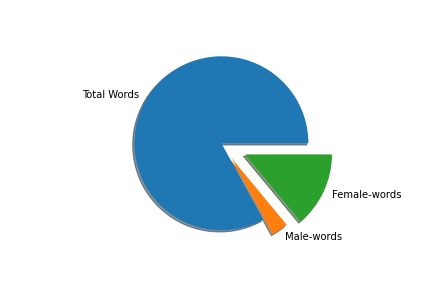

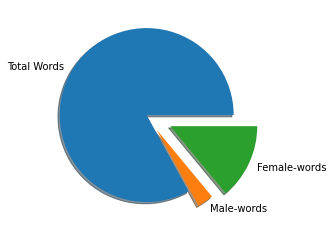

In [ ]:
print('please enter the input file path')
fname = input()
#fname = "/content/drive/MyDrive/input_1.csv"
gender_str, Total_words, M_list, len_M_list, F_list, len_F_list, M_count, F_count,plt, img_tag = Main(fname)  
'''print('Total no. of words', Total_words)
print('Words matching with male pattern', M_list)
print('No. of words matching with male pattern', len_M_list)
print('Words matching with female pattern', F_list)
print('No. of words matching with female pattern', len_F_list)
print('Male word count', M_count)
print('Female word count', F_count)'''
print('Gender of the user is', gender_str)
from IPython.display import Image
Image(img_tag)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Demo-PRSG

/content/drive/MyDrive/Demo-PRSG


In [ ]:
!pip install flask-ngrok

In [ ]:
#from flask import Flask 

#app = Flask(__name__) 



from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok 
from sklearn.externals import joblib
import pandas as pd
import numpy as np

import os

PEOPLE_FOLDER = os.path.join('static')

app = Flask(__name__)
run_with_ngrok(app) 
app.config['UPLOAD_FOLDER'] = PEOPLE_FOLDER


@app.route('/')


def home():
    return render_template('home_gender_new.html')

@app.route("/predict",methods=['GET','POST'])

def predict():
    if request.method == 'POST':
        try:
            text=(request.form['text'])
            gender_str, Total_words, M_list, len_M_list, F_list, len_F_list, M_c, F_c, plt, image_tag  = Main(text) 
            full_filename = os.path.join(app.config['UPLOAD_FOLDER'], 'count.png')            
        except valueError:
            return "please Check if the values are entered correctly"
    #return render_template('predict_gender_new.html', prediction=author[0]) gender_str
    return render_template('predict_gender_new.html', prediction= gender_str, Total_Words_ = Total_words, M_list_= M_list, len_M_=len_M_list, F_list_=F_list, len_F_=len_F_list,  user_image=full_filename)
    #with open('outputs.txt', 'r') as f: 
    #           return render_template('content.html', text=f.read(), user_image = 'count.png'  ) 

if __name__=="__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9dc75c9ae756.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Mar/2021 16:01:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:01:39] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Mar/2021 16:14:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:14:39] "GET /favicon.ico HTTP/1.1" 404 -


The query tweets are: 
['thoughts turn inward today want idea pisces', 'woke up find passed college exams yayyy', 'course', 'amp online register mobile', 'qualified gym instructor circuit trainer instructor up personal trainer award', 'passed circuit training assessment morning', 'eye opening documentaries watched flood movie national geographic', 'yeah true thanks mill marianne', 'think ill supposed start today but katies giving time sort', 'yeah suppose think afraid ill no good running good', 'yeah thats thinking wanted work but recently started new job amp feel like id useless', 'offered job blues new restaurant amp no idea help', 'pretty little liars coming end not know life literally sobbing', 'boyfriend randomly orders food house', 'heartbreaking hearing happened night absolutely devastating rip jane', 'not watched xfactor started but turned busted shawn mendes john legend', 'never ordering missguided again ordered bodysuits came amp ridiculously faulty happy thursday', 'wish fin

127.0.0.1 - - [07/Mar/2021 16:15:11] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Mar/2021 16:15:12] "GET /static/count.png HTTP/1.1" 200 -


The query tweets are: 
['thoughts turn inward today want idea pisces', 'woke up find passed college exams yayyy', 'course', 'amp online register mobile', 'qualified gym instructor circuit trainer instructor up personal trainer award', 'passed circuit training assessment morning', 'eye opening documentaries watched flood movie national geographic', 'yeah true thanks mill marianne', 'think ill supposed start today but katies giving time sort', 'yeah suppose think afraid ill no good running good', 'yeah thats thinking wanted work but recently started new job amp feel like id useless', 'offered job blues new restaurant amp no idea help', 'pretty little liars coming end not know life literally sobbing', 'boyfriend randomly orders food house', 'heartbreaking hearing happened night absolutely devastating rip jane', 'not watched xfactor started but turned busted shawn mendes john legend', 'never ordering missguided again ordered bodysuits came amp ridiculously faulty happy thursday', 'wish fin

127.0.0.1 - - [07/Mar/2021 16:21:17] "POST /predict HTTP/1.1" 200 -


Before App


In [ ]:
cd /content/drive/MyDrive/Demo-PRSG

/content/drive/MyDrive/Demo-PRSG


In [ ]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok 
import os

PEOPLE_FOLDER = os.path.join('static')

app = Flask(__name__)
run_with_ngrok(app) 
app.config['UPLOAD_FOLDER'] = PEOPLE_FOLDER

@app.route('/')


def home():
    return render_template('home_gender_new.html')

@app.route("/predict",methods=['GET','POST'])

def predict():
    if request.method == 'POST':
        try:
            full_filename = os.path.join(app.config['UPLOAD_FOLDER'], 'count.png')
        except valueError:
            return "please Check if the values are entered correctly"
    return render_template("index.html", user_image = full_filename) 

if __name__=="__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://d01007797f90.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [05/Mar/2021 16:42:47] "GET / HTTP/1.1" 200 -
